In [ ]:
import os
import numpy as np
import csv
import matplotlib.pyplot as plt

from PIL import Image

In [ ]:
letters = [c[0] for c in open('./resources/letters.txt', 'r', encoding='UTF-8')]

In [ ]:
def calculate_characteristics(img: Image.Image, c):
    pix = img.load()
    width = img.size[0]
    height = img.size[1]

    size, size1, weight_black, normal_black, x_center, y_center = 0, 0, 0, 0, 0, 0

    for i in range(width):
        for j in range(height):
            if pix[i, j] == 0:
                weight_black += 1
                x_center += i
                y_center += j

    size = width * height
    normal_black = weight_black / size
    x_center = x_center / weight_black
    x_norm_center = (x_center - 1) / (width - 1)
    y_center = y_center / weight_black
    y_norm_center = (y_center - 1) / (height - 1)
    x_moment, x_norm_moment, y_moment, y_norm_moment = 0, 0, 0, 0

    for i in range(width):
        for j in range(height):
            if pix[i, j] == 0:
                x_moment = (j - y_center) ** 2
                y_moment = (i - y_center) ** 2

    size1 = width * width + height * height
    x_norm_moment = x_moment / size1
    y_norm_moment = y_moment / size1


    return {
            'Буква': c,
            'Вес (масса черного)': weight_black,
            'Удельный вес (вес, нормированный к площади)': normal_black,
            'Координаты центра тяжести': (x_center, y_center),
            'Нормированные координаты центра тяжести': (x_norm_center, y_norm_center),
            'Осевые моменты инерции по горизонтали и вертикали': (x_moment, y_moment),
            'Нормированные осевые моменты инерции': (x_norm_moment, y_norm_center),
        }

In [ ]:
def get_profiles(file):
    img = Image.open(file)
    width = img.size[0]
    height = img.size[1]
    x_profiles = []
    y_profiles = []

    for x in range(width):
        bright = 0
        for y in range(height):
            pix = img.getpixel((x, y))
            if pix == 0:
                bright += 1
        x_profiles.append(bright)

    for y in range(height):
        bright = 0
        for x in range(width):
            pix = img.getpixel((x, y))
            if pix == 0:
                bright += 1
        y_profiles.append(bright)

    return x_profiles, y_profiles

In [ ]:
def get_hist_profile():
    for c in letters:

        x_profile, y_profile = get_profiles(f'./output_images/letters/{c}.png')
        fig, axs = plt.subplots(1, 2, figsize=(9, 3))

        axs[0].bar(np.arange(0, len(x_profile)), height=x_profile)
        axs[1].barh(np.arange(0, len(y_profile)), width=y_profile)

        plt.savefig(f'hists/{c}.png', dpi=70)
        del fig
        del axs

In [ ]:
def save_csv_report():
    with open('./report.csv', 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=['Буква', 'Вес (масса черного)', 'Удельный вес (вес, нормированный к площади)', 'Координаты центра тяжести', 'Нормированные координаты центра тяжести', 'Осевые моменты инерции по горизонтали и вертикали', 'Нормированные осевые моменты инерции'])
        writer.writeheader()
        for i, c in enumerate(letters):
            image = Image.open(f'./output_images/letters/{c}.png').convert('L')
            writer.writerow(calculate_characteristics(image, c))

In [ ]:
save_csv_report()

In [ ]:
plt.rcParams.update({'figure.max_open_warning': 0})
get_hist_profile()

In [ ]:

with open('./REPORT.md', 'a') as file:

    for i, c in enumerate(letters):
        file.write(f'{i+1}. \n\n Буква {c} \n\n')
        file.write(f'#### Профиль для шрифта ChisatoRegular\n\n')
        file.write(f'![](./hists/{c}.png)\n\n')
        file.write(f'#### Буква в шрифте ChisatoRegular\n\n')
        file.write(f'![](./output_images/letters/{c}.png)\n\n')
        file.write(f'![](./output_images/letters/{c}_inverse.png)\n\n')
        file.write(f'#### Буква в шрифте Calibri\n\n')
        file.write(f'![](./output_images/letters_calibri/{c}.png)\n\n')
        file.write(f'![](./output_images/letters_calibri/{c}_inverse.png)\n\n')

In [104]:
save_csv_report()

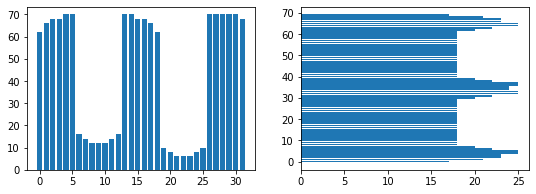

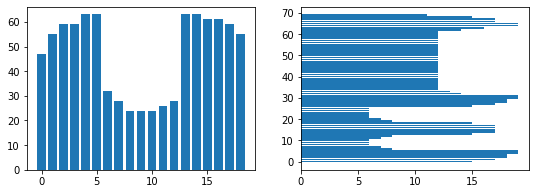

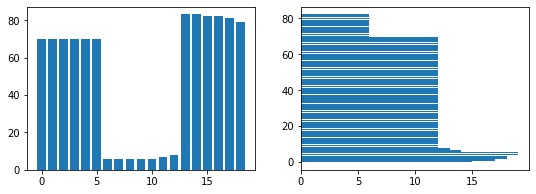

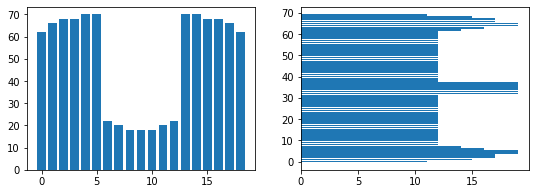

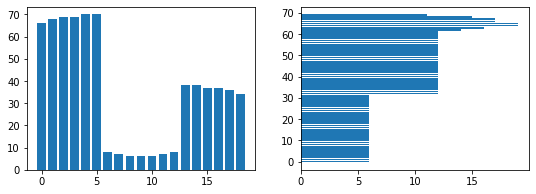

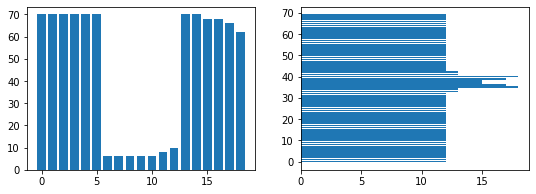

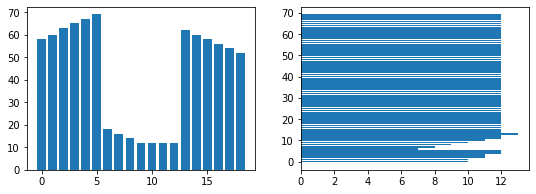

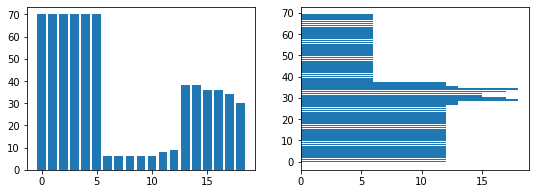

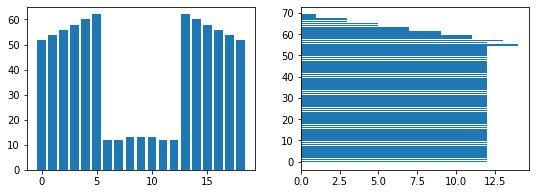

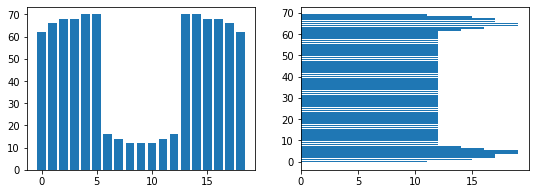

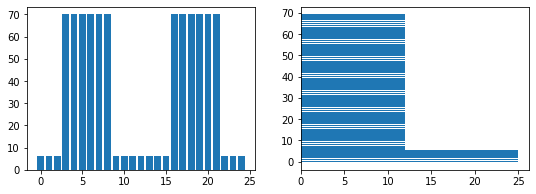

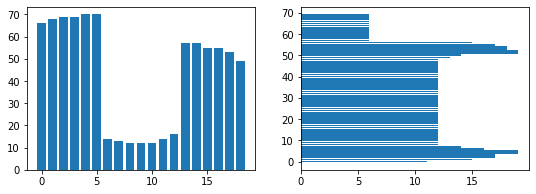

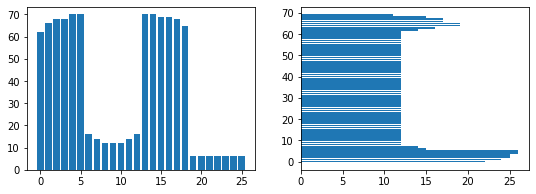

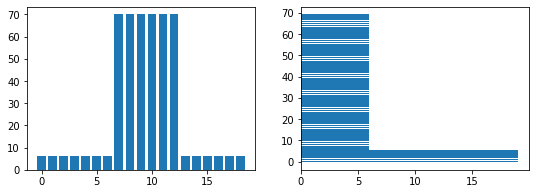

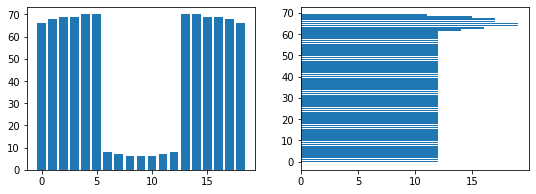

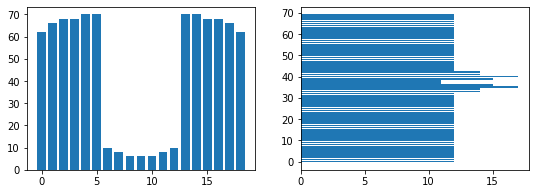

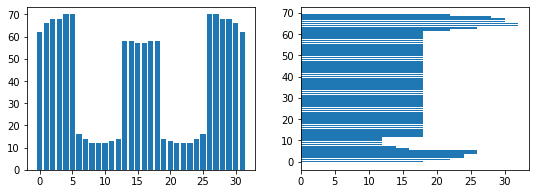

In [105]:
plt.rcParams.update({'figure.max_open_warning': 0})
get_hist_profile()

In [5]:

with open('./REPORT.md', 'a') as file:

    for i, c in enumerate(letters):
        file.write(f'{i+1}. \n\n Буква {c} \n\n')
        file.write(f'#### Профиль для шрифта ChisatoRegular\n\n')
        file.write(f'![](./hists/{c}.png)\n\n')
        file.write(f'#### Буква в шрифте ChisatoRegular\n\n')
        file.write(f'![](./output_images/letters/{c}.png)\n\n')
        file.write(f'![](./output_images/letters/{c}_inverse.png)\n\n')
        file.write(f'#### Буква в шрифте Calibri\n\n')
        file.write(f'![](./output_images/letters_calibri/{c}.png)\n\n')
        file.write(f'![](./output_images/letters_calibri/{c}_inverse.png)\n\n')